# KMeans Algorithm Implementation

## Load Libraries

In [420]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [304]:
iris = load_iris()

In [305]:
X, y = iris['data'], iris['target']

[Numpy random sampling from ND array](https://stackoverflow.com/questions/14262654/numpy-get-random-set-of-rows-from-2d-array)

## Define functions

### Distance (dissimilarity) function

In [422]:
def distance(x:np.array, y: np.array, dist='minkowski', p=2):
    '''Calculate the distance between two points'''
    return sum(abs(x-y)**(p))**(1/p)

In [416]:
@np.vectorize
def mapvals(x, d: dict):
    if x in d:
        return(d[x])
    else:
        return x

### kmeans function

In [467]:
def intra_cluster_metric(X, x, p=1):
    return (abs(X-np.broadcast_to(x, X.shape))**p).sum()

In [468]:
from scipy import stats

def calculate_representative_point(X, method='mean', 
                                   cost_func=intra_cluster_metric,
                                   data_type='continous'):
    '''
    Calculate representative point
    
    Parameters
    ----------
    X: np.array
        Data points belonging to a cluster
    
    method: str, optional, default: 'mean'
        Method used to calculate the representative point of the cluster
        'mean' -> KMeans, 'medoid' -> KMedoid (PAM), 'mode' -> KMode
    
    '''
    if method == 'mean':
        return X.mean(axis=0)
    
    if method == 'medoid':
        n = X.shape[0]
        costs = np.zeros(n)        
        i = 0
        for i in range(n):
            costs[i] = cost_func(X, X[i, :])
            
        return X[np.argmin(costs)]
    
    if method == 'mode':
        if data_type == 'continous':
            return calculate_representative_point(X, method='medoid', cost_func=cost_func)
        
        if data_type == 'discrete':
            return stats.mode(X).mode

In [469]:
def kmeans(X: np.array, K=8, max_iter=200,
           return_iter_ids=False,
           return_iter_centroids=False,
           distance_kwargs=None,
           centroid_method='mean'):
    '''
    Perform KMeans clustering.

    Parameters
    ----------
    X : np.array
        Data points on which clustering is to be performed
        
    K : int, optional, default: 8
        Number of clusters
        
    max_iter: int, optional, default: 200
        Maximum number of iterations to perform
    
    return_iter_ids: bool, optional, default: False
        Whether to return the cluster ids of each iteration or not
        
    return_iter_centroids: bool, optional, default: False
        Whether to return the centroids of each iteration or not
        
    centroid_method: str, optional, default: 'mean'
        Method used to calculate the representative point of the cluster
        'mean' -> KMeans, 'medoid' -> KMedoid (PAM), 'mode' -> KMode
    

    '''
    # Cluster ids for each of the points
    cluster_ids = np.zeros(X.shape[0], dtype=int)

    # Randomy choose cluster centroids
    idx = np.random.choice(X.shape[0], K)
    cluster_ids[idx] = range(K)
    centroids = X[idx]
    
    iter_ids = np.zeros((max_iter+1, X.shape[0]))
    iter_centroids = np.zeros((max_iter, K, X.shape[1]))


    # For each: assign point to cluster with minimum distance
    # Stop when: No reassignment
    


    def reassignment():
        '''Check reassignment of cluster points'''
        return not (np.array_equal(cluster_ids, old_ids))

    def first_iteration():
        '''Check if first iteration'''
        return i==0

    def recalculate_centroids(method=centroid_method):
        '''Recalculate centroids'''
        for clstr_id in range(K):
            centroids[clstr_id, :] = calculate_representative_point(X[cluster_ids == clstr_id, :], 
                                                                    method)
            
            
            
    def assign_cluster(pt):
        pass

    distances = np.zeros(K)
    old_ids = cluster_ids.copy()
    
    i=0
    while (reassignment() or first_iteration()) or i < max_iter:
        old_ids = cluster_ids.copy()
        j=0
        for pt in X:
            l=0
            for cntrd in centroids:
                distances[l] = distance(pt, cntrd)
                l += 1

            cluster_ids[j] = np.argmin(distances)
            j += 1
            
        iter_ids[i, :] = cluster_ids


        recalculate_centroids()
        iter_centroids[i, :, :] = centroids 
        i += 1
        
    result = {'cluster_ids': cluster_ids, 
              'centroids': centroids}
    
    if return_iter_centroids:
        result['iter_centroids'] = iter_centroids[:i-1]
        
    if return_iter_ids:
        result['iter_ids'] = iter_ids[:i-1]
        
    return result



## Test and compare with sklearn implementation

In [480]:
features = [0, 1]
X1 = X[:, features]

In [482]:
result = kmeans(X1, K=3, return_iter_centroids=True, centroid_method='mean')

In [483]:
model = KMeans(3)
sklearn_ids = model.fit_predict(X1)

In [484]:
sklearn_ids

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [485]:
result['cluster_ids']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

**NOTE:** Carefully see the cluster id's and choose the appropriate mapping. Needs to be automated using an algorithm for best match.

In [486]:
result['cluster_ids'] = mapvals(result['cluster_ids'], {0:2, 2:1, 1:0})

### Plot the comparison

[Matplotlib color according to class labels](https://stackoverflow.com/questions/12487060/matplotlib-color-according-to-class-labels)

In [487]:
colors = ['red', 'green', 'blue']

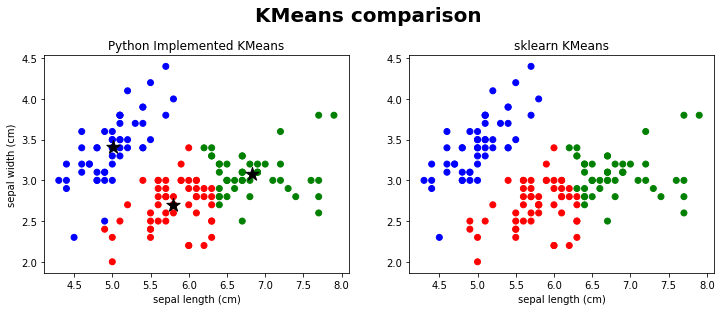

In [488]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.scatter(X[:, 0], X[:, 1], c=result['cluster_ids'], cmap=ListedColormap(colors))
ax1.scatter(result['centroids'][:, 0], result['centroids'][:, 1], marker="*", color='black', s=200)
ax1.set_title('Python Implemented KMeans')
ax1.set_xlabel(iris['feature_names'][features[0]])
ax1.set_ylabel(iris['feature_names'][features[1]])

ax2.scatter(X[:, 0], X[:, 1], c=sklearn_ids, cmap=ListedColormap(colors))
ax2.set_title('sklearn KMeans')
ax2.set_xlabel(iris['feature_names'][features[0]])



fig.suptitle('KMeans comparison', fontsize=20, fontweight='bold', y=1.05)

plt.savefig('KMeans_comparison.pdf', dpi=400, bbox_inches='tight')